<h3>Define the SMA code</h3>

In [1]:
def simpleMovingAverage(periodSMA, data):
    
    #--- import libraries
    import numpy as np
    
    #--- define variables
    n = periodSMA
    
    #--- calculate SMA
    ret = np.cumsum(data, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret = ret[n - 1:] / n
    
    #--- return array of number the same length as the input
    return np.append(np.zeros(n-1) + np.nan, ret)

<h3>Run SMA code on local test data</h3>

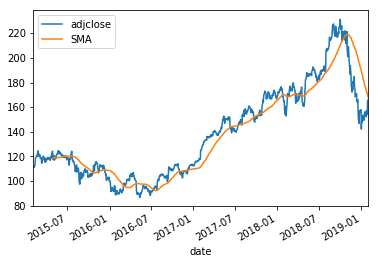

In [4]:
commonDIR = r'C:\System\Documents\MEGA\thetradingapp\jobs\common\python'

import sys, os
sys.path.insert(0, os.path.abspath(commonDIR))
from localData import sp500Data

symbol = 'AAPL'
start_date = '2015-02-01'
end_date = '2019-02-01'


#--- get data
sp500Data = sp500Data()
sdata = sp500Data.extractDay(symbols=[symbol],
                        columns=['adjclose'],
                        printSummary=False,
                        startDate=start_date,
                        endDate=end_date,
                        ascending=True)
#--- keep just the adjclose column
sdata = sdata[['adjclose']]

#--- calculate
sdata['SMA'] = simpleMovingAverage(60, sdata['adjclose'].values)

#--- quick plot
sdata.plot()

<h3>Demonstrate with tiClass Implementation</h3>

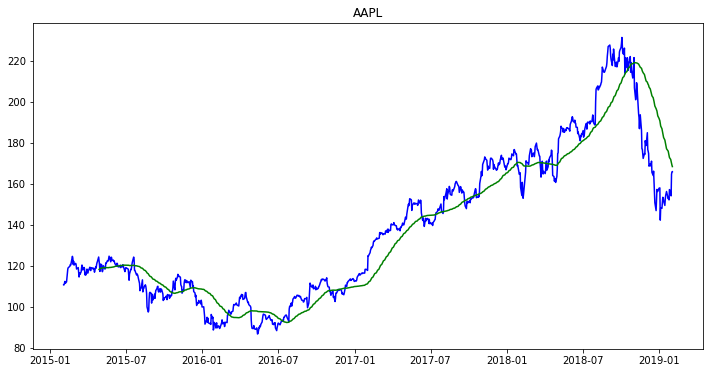

In [5]:
import sys
sys.path.insert(0, commonDIR)
from tiClass import tiClass

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt

ti = tiClass()
ti.periodSMA = 60
vars(ti)

#--- get data
df = sp500Data.extractDay(symbols=[symbol],
                        columns=['adjclose'],
                        printSummary=False,
                        startDate=start_date,
                        endDate=end_date,
                        ascending=True)
#--- keep just the adjclose column
df = df[['adjclose']]

#--- calculate
df['SMA'] = ti.simpleMovingAverage(df['adjclose'].values)

#--- graph the data
plt.figure(figsize=(12,6))
plt.title(symbol)
plt.plot(df['adjclose'],color='b')
plt.plot(df['SMA'],color='g')